In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
import pandas_datareader as pdr
import seaborn
from statsmodels.regression.rolling import RollingOLS

# Autoregressive Moving Average (ARMA): Sunspots data

In [2]:
dta = sm.datasets.sunspots.load_pandas().data

In [3]:
dta

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


<Axes: >

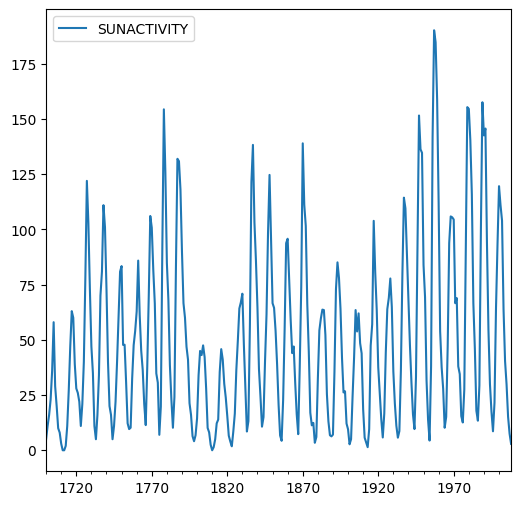

In [16]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta.plot(figsize=(6, 6))

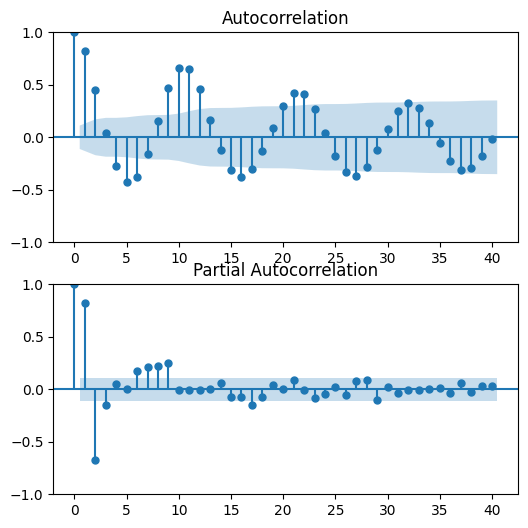

In [17]:
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [15]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727181
dtype: float64


In [28]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()
print(f"AIC mod20 : {arma_mod20.aic}\nBIC mod20 : {arma_mod20.bic}\nHQIC mod20 : {arma_mod20.hqic}\n")
print(f"Parameters : \n{arma_mod30.params}\n")
print(f"AIC mod30 : {arma_mod30.aic}\nBIC mod30 : {arma_mod30.bic}\nHQIC mod 30 : {arma_mod30.hqic}")

AIC mod20 : 2622.6370933008184
BIC mod20 : 2637.570458408409
HQIC mod20 : 2628.6074811460644

Parameters : 
const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64

AIC mod30 : 2619.4036292456467
BIC mod30 : 2638.0703356301356
HQIC mod 30 : 2626.866614052204


In [30]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564953611554672

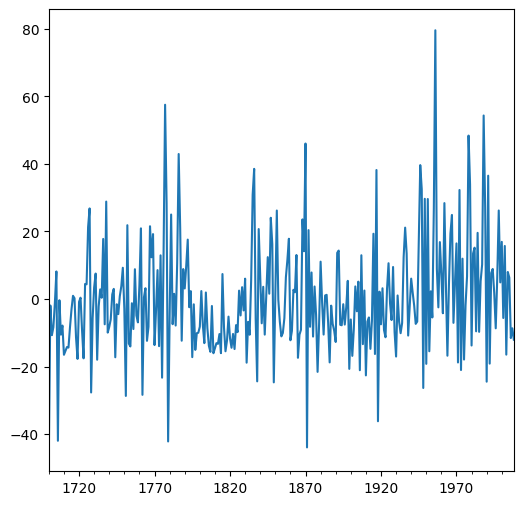

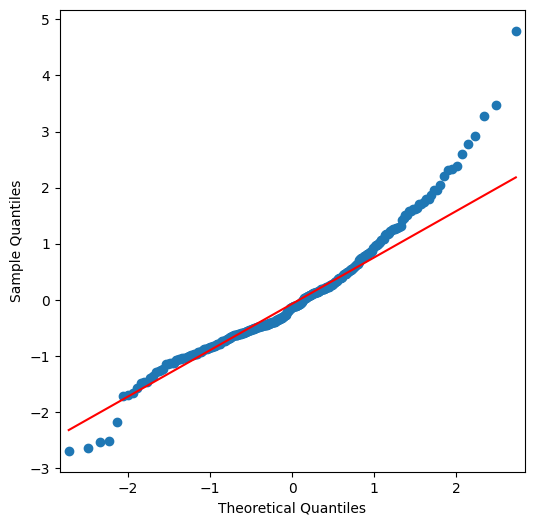

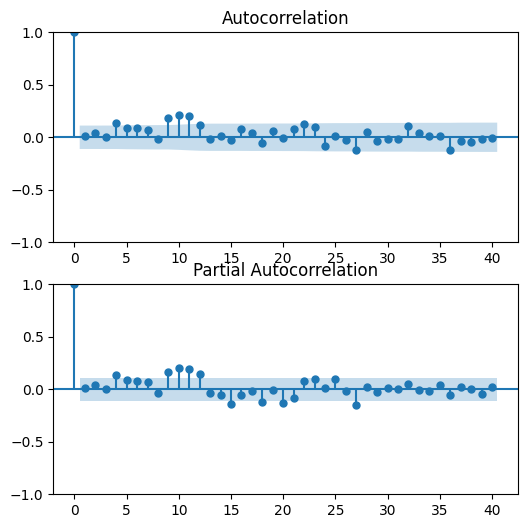

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)
resid = arma_mod30.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [33]:
r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[np.arange(1, 25), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009170   0.026239  8.713184e-01
2.0   0.041793   0.572982  7.508939e-01
3.0  -0.001338   0.573544  9.024612e-01
4.0   0.136086   6.408642  1.706385e-01
5.0   0.092465   9.111351  1.047043e-01
6.0   0.091947  11.792661  6.675737e-02
7.0   0.068747  13.296552  6.520425e-02
8.0  -0.015022  13.368601  9.978086e-02
9.0   0.187590  24.641072  3.394963e-03
10.0  0.213715  39.320758  2.230588e-05
11.0  0.201079  52.359565  2.346490e-07
12.0  0.117180  56.802479  8.580351e-08
13.0 -0.014057  56.866630  1.895209e-07
14.0  0.015398  56.943864  4.000370e-07
15.0 -0.024969  57.147642  7.746545e-07
16.0  0.080916  59.295052  6.876728e-07
17.0  0.041138  59.852008  1.111674e-06
18.0 -0.052022  60.745723  1.549418e-06
19.0  0.062496  62.040011  1.832778e-06
20.0 -0.010303  62.075305  3.383285e-06
21.0  0.074453  63.924941  3.195540e-06
22.0  0.124954  69.152955  8.984238e-07
23.0  0.093162  72.069214  5.803579e-07


In [35]:
predict_sunspots = arma_mod30.predict("1990", "2012", dynamic=True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424877
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [36]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [37]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.634833002279541

## Can you obtain a better fit for the Sunspots model?

In [39]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(1234)

In [40]:
# include zero-th lag
arparams = np.array([1, 0.75, -0.65, -0.55, 0.9])
maparams = np.array([1, 0.65])

## Let’s make sure this model is estimable.

In [44]:
arma_t = ArmaProcess(arparams, maparams)

In [45]:
arma_t.isinvertible

True

In [46]:
arma_t.isstationary

False

## What does this mean?

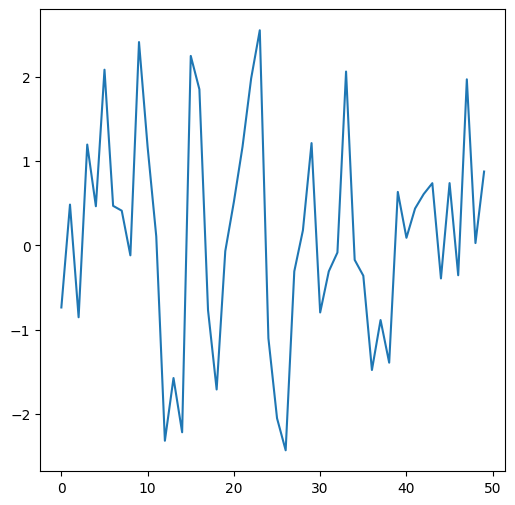

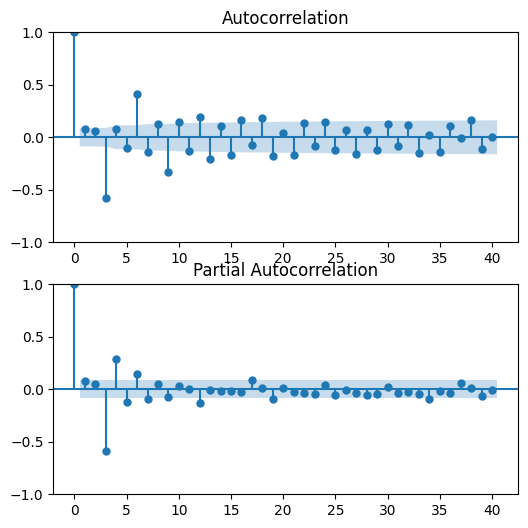

In [49]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample=50))
arparams = np.array([1, 0.35, -0.15, 0.55, 0.1])
maparams = np.array([1, 0.65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary
arma_rvs = arma_t.generate_sample(nsample=500, burnin=250, scale=2.5)
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

In [51]:
lags = int(10 * np.log10(arma_rvs.shape[0]))
arma11 = ARIMA(arma_rvs, order=(1, 0, 1)).fit()
resid = arma11.resid
r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
data = np.c_[range(1, lags + 1), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))
arma41 = ARIMA(arma_rvs, order=(4, 0, 1)).fit()
resid = arma41.resid

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


            AC           Q       Prob(>Q)
lag                                      
1.0  -0.003132    0.004933   9.440046e-01
2.0   0.097916    4.837227   8.904501e-02
3.0  -0.594594  183.386616   1.637101e-39
4.0   0.138562  193.102409   1.141767e-40
5.0  -0.142487  203.397282   5.328041e-42
6.0   0.438634  301.155018   4.626761e-62
7.0  -0.182388  318.091284   8.249366e-65
8.0   0.167354  332.379673   5.202309e-67
9.0  -0.356491  397.346240   5.045248e-80
10.0  0.188344  415.517337   4.677177e-83
11.0 -0.162414  429.057076   4.106093e-85
12.0  0.223412  454.729529   9.349442e-90
13.0 -0.235171  483.234013   5.308928e-95
14.0  0.141786  493.616562   2.089273e-96
15.0 -0.192934  512.880740   1.063522e-99
16.0  0.190087  531.619094  6.942076e-103
17.0 -0.102229  537.050045  2.907444e-103
18.0  0.201940  558.285951  5.538863e-107
19.0 -0.198913  578.932854  1.400223e-110
20.0  0.067039  581.282967  2.512320e-110
21.0 -0.184760  599.170695  2.389415e-113
22.0  0.159598  612.545950  2.0092

In [52]:
r, q, p = sm.tsa.acf(resid, nlags=lags, fft=True, qstat=True)
data = np.c_[range(1, lags + 1), r[1:], q, p]
table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))

            AC          Q  Prob(>Q)
lag                                
1.0   0.002072   0.002159  0.962941
2.0   0.015170   0.118144  0.942639
3.0   0.029114   0.546232  0.908623
4.0  -0.002367   0.549068  0.968552
5.0   0.034067   1.137564  0.950725
6.0   0.039547   1.932204  0.925827
7.0  -0.030516   2.406321  0.933984
8.0   0.034966   3.030054  0.932457
9.0  -0.109568   9.167095  0.421995
10.0 -0.022329   9.422497  0.492530
11.0  0.024849   9.739429  0.553967
12.0 -0.056263  11.367595  0.497706
13.0 -0.066968  13.679032  0.396830
14.0 -0.009765  13.728281  0.470144
15.0  0.044619  14.758615  0.468940
16.0 -0.060968  16.686261  0.406174
17.0  0.046772  17.823123  0.400081
18.0  0.025146  18.152408  0.445656
19.0 -0.036145  18.834150  0.467521
20.0 -0.091035  23.167727  0.280634
21.0  0.006300  23.188526  0.334010
22.0 -0.016429  23.330258  0.383286
23.0 -0.014973  23.448235  0.434866
24.0 -0.003832  23.455979  0.493032
25.0 -0.019737  23.661820  0.538976
26.0 -0.044190  24.695885  0

In [54]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
cpi = macrodta["cpi"]

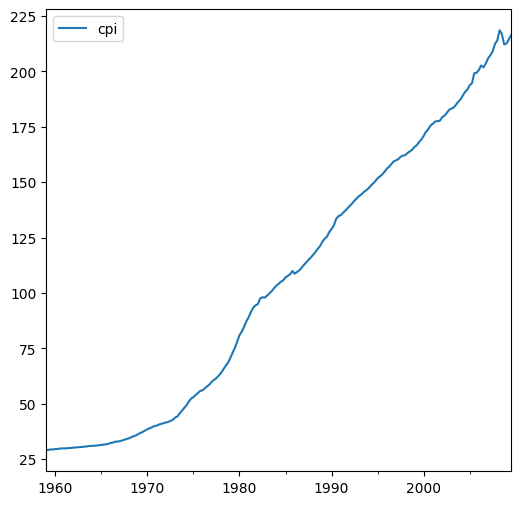

In [55]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax)
ax.legend()

In [56]:
print(sm.tsa.adfuller(cpi)[1])

0.9904328188337421


# Ordinary Least Squares

In [57]:
np.random.seed(9876789)

## Artificial data

In [58]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

## Our model needs an intercept so we add a column of 1s:

In [59]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

## Fit and summary:

In [60]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.83e-239
Time:                        13:40:38   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

Notes: Standard Errors assume that the covariance matrix of the errors is correctly specified. Quantities of interest can be extracted directly from the fitted model. Type dir(results) for a full list. Here are some examples:

In [62]:
print(f"Parameters : {results.params}")
print(f"R2 : {results.rsquared}")

Parameters : [ 1.34233516 -0.04024948 10.01025357]
R2 : 0.9999879365025871


> OLS non-linear curve but linear in parameters - We simulate artificial data with a non-linear 
relationship between x and y:

In [63]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

In [64]:
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Fit and summary:

In [73]:
print(f"Parameters : {results.params}")
print(f"R2 : {results.rsquared}")

Parameters : [ 1.34233516 -0.04024948 10.01025357]
R2 : 0.9999879365025871


>OLS non-linear curve but linear in parameters - We simulate artificial data with a non-linear relationship between x and y:

In [71]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

In [72]:
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Fit and summary:

In [69]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           6.30e-27
Time:                        13:43:41   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

## Extract other quantities of interest:

In [76]:
print(f"Parameters : {results.params}\n")
print(f"Standard errors : {res.bse}\n")
print(f"Predicted values : \n{res.predict()}")

Parameters : [ 1.34233516 -0.04024948 10.01025357]

Standard errors : [0.02640602 0.10380518 0.00231847 0.17121765]

Predicted values : 
[ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


>Draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the 
predictions are built using the wls_prediction_std command.

In [77]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

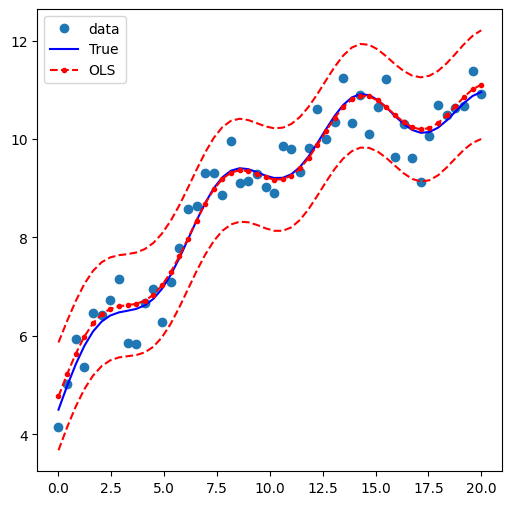

In [79]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

# OLS with dummy variables

> We generate some artificial data. There are 3 groups which will 
be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [80]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2

In [81]:
dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)

## Drop reference category

In [82]:
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

In [83]:
beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

## Inspect the data

In [89]:
X[:5, :]

array([[0.        , 0.        , 0.        , 1.        ],
       [0.40816327, 0.        , 0.        , 1.        ],
       [0.81632653, 0.        , 0.        , 1.        ],
       [1.2244898 , 0.        , 0.        , 1.        ],
       [1.63265306, 0.        , 0.        , 1.        ]])

In [90]:
y[:5]

array([ 9.25484014, 10.48168695, 10.66435603, 10.43703913, 10.7448769 ])

In [91]:
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [92]:
dummy[:5, :]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

## Fit and summary

In [93]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     559.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           3.45e-36
Time:                        13:51:44   Log-Likelihood:                -70.098
No. Observations:                  50   AIC:                             148.2
Df Residuals:                      46   BIC:                             155.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9551      0.067     14.294      0.0

> Draw a plot to compare the true relationship to OLS predictions:

In [94]:
pred_ols2 = res2.get_prediction()
iv_l = pred_ols2.summary_frame()["obs_ci_lower"]
iv_u = pred_ols2.summary_frame()["obs_ci_upper"]

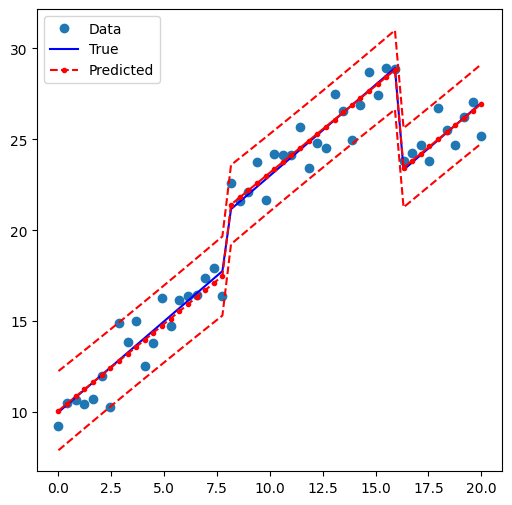

In [96]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")

# Rolling Regression

>Rolling OLS applies OLS across a fixed windows of observations and then rolls (moves or slides)
the window across the data set. They key parameter is window which determines the number of
observations used in each OLS regression. By default, RollingOLS drops missing values in the window and so will estimate the model using the available data points.

>Estimated values are aligned so that models estimated using data points
are stored in location. Start by importing the modules that are used in this notebook.

In [100]:
seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()

>pandas-datareader is used to download data from Ken French’s website. The two data sets
downloaded are the 3 Fama-French factors and the 10 industry portfolios. Data is available from
1926.The data are monthly returns for the factors or industry portfolios.

In [130]:
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="1-1-1926")
factors[0].head().squeeze()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


In [132]:
industries = pdr.get_data_famafrench("10_Industry_Portfolios", start="1-1-1926")
industries[0].head().squeeze()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


>The first model estimated is a rolling version of the CAPM that regresses the excess return of 
Technology sector firms on the excess return of the market.

> The window is 60 months, and so results are available after the first 60 (window) months. The first
59 (window - 1) estimates are all nan filled.

In [133]:
endog = industries[0].HiTec - factors[0].RF.values
exog = sm.add_constant(factors[0]["Mkt-RF"])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.head()

,const,Mkt-RF
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [124]:
params.iloc[57:62]

,const,Mkt-RF
58,NaN,NaN
59,NaN,NaN
60,0.876155,1.399240
61,0.879936,1.406578
62,0.953169,1.408826


In [125]:
params.tail()

,const,Mkt-RF
1167,0.467433,1.089181
1168,0.503117,1.082687
1169,0.587508,1.090195
1170,0.528967,1.095849
1171,0.558506,1.098306


>We next plot the market loading along with a 95% point-wise confidence interval. The alpha=False omits the constant column, if present.

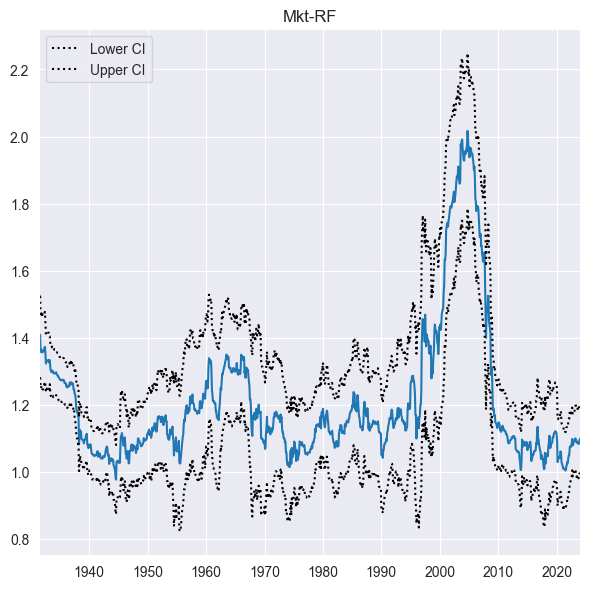

In [136]:
fig = rres.plot_recursive_coefficient(variables=["Mkt-RF"], figsize=(6, 6))

> Next, the model is expanded to include all three factors, the excess market, the size factor and the
value factor.

In [138]:
exog_vars = ["Mkt-RF", "SMB", "HML"]
exog = sm.add_constant(factors[0][exog_vars])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()

# Formulas

> RollingOLS and RollingWLS both support model specification using the formula interface. The example below is equivalent to the 3-factor model estimated previously. Note that one variable is renamed to have a valid Python variable name.

In [142]:
joined = pd.concat([factors[0], industries[0]], axis=1)
joined["Mkt_RF"] = joined["Mkt-RF"]
mod = RollingOLS.from_formula("HiTec ~ Mkt_RF + SMB + HML", data=joined, window=60)
rres = mod.fit()
rres.params.tail()

,Intercept,Mkt_RF,SMB,HML
Date,,,,
2023-09,0.526829,1.110522,-0.087064,-0.354267
2023-10,0.541961,1.109685,-0.093918,-0.353917
2023-11,0.630157,1.121986,-0.105796,-0.350210
2023-12,0.623413,1.127696,-0.091813,-0.345713
2024-01,0.637316,1.130686,-0.092447,-0.346699


In [144]:
res = RollingOLS(endog, exog, window=60, min_nobs=12, expanding=True).fit()

In [145]:
res.params.iloc[10:15]

,const,Mkt-RF,SMB,HML
Date,,,,
1927-05,NaN,NaN,NaN,NaN
1927-06,1.560283,0.999383,1.351219,-0.471879
1927-07,1.235899,1.294857,0.742924,-0.540048
1927-08,1.249999,1.297546,0.752327,-0.548306
1927-09,1.375626,1.286724,1.177758,-0.609331


In [147]:
res.nobs[10:15]

Date
1927-05     0
1927-06    12
1927-07    13
1927-08    14
1927-09    15
Freq: M, dtype: int32